In [2]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline

#### Load the image

(900, 604, 3)


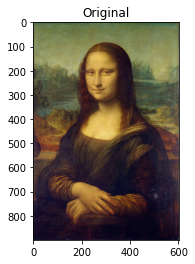

In [4]:
img = Image.open("Mona_Lisa.jpg")
img = np.asarray(img)
plt.title("Original")
plt.imshow(img);
print(np.shape(img))

#### Preprocessing the input

For random forest inputs, proprocessing steps are not necessary. The results should be consistent regardless of what preprocessing menthods you choose, because the tree can always pick corresponding splitting points to yield the same result.

In [20]:
#uniformly sample 5,000 random(x,y) coordinate locations
train_X,train_Y=[],[]
sample_size=5000
for i in range(sample_size):
    sample=[]
    #rows
    sample.append(np.random.randint(img.shape[0]))
    #columns
    sample.append(np.random.randint(img.shape[1]))
    train_X.append(sample)#x,y 
    train_Y.append(img[sample[0],sample[1]])#rgb

In [21]:
test_X,test_Y=[],[]
for row in range(img.shape[0]): 
    for col in range(img.shape[1]):
        point=[row,col]
        test_X.append(point)
        test_Y.append(img[point[0],point[1]])
print(train_X[0],test_X[0])
print(train_Y[0],test_Y[0])

[528, 553] [0, 0]
[59 26 43] [103 121  97]


#### Preprocessing the output

I want to preserve color information of the image, thus my function maps $(x,y)$ coordinates to $(r,g,b)$ values: $f : R^2 → R^3$ rather than converting it to greyscale.  

No processing steps are necessary for random regression forest outputs, because random forecast is a tree-based model and this algorithem requires partitioning, even if we apply normalization, the results remain the same. 

In [22]:
# rescale pixel intensities from 0 to 255 to 0 to 1
scaling = np.array(img)
for row in range(img.shape[0]): 
    for col in range(img.shape[1]):
        scaling[row,col]=img[row,col]/255 

#### To build the final image

In [45]:
def random_forest(n_trees,depth,title):
    regressor = RandomForestRegressor(n_estimators = n_trees,random_state=0, max_depth= depth) 
    regressor.fit(train_X, train_Y) 
    pred = np.zeros(np.shape(img))
    for row in range(img.shape[0]): 
        for col in range(img.shape[1]):
            loc=[row,col]
            loc=np.array(loc)
            pred[row,col]=regressor.predict(loc.reshape(1, 2)) /255      
    plt.title(title);
    plt.imshow(pred);
    plt.show();

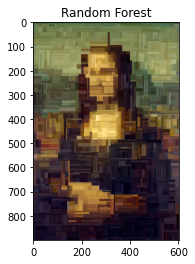

In [46]:
random_forest(1,None,title = "Random Forest")

#### Experiments: random forest with a single decision tree but with various depth

As we increase the depth, we get more color variances, and the resolution of the image improves as well. With depth =1, the image is only divided once, thus we have two colors. When depth=15, we divide multiple times, the image sharpens.

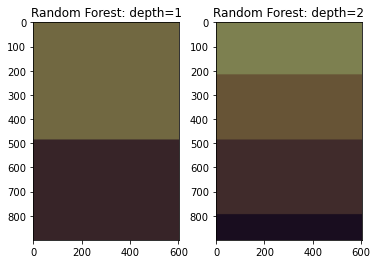

In [65]:
for i,d in enumerate([1,2]):
    regressor = RandomForestRegressor(n_estimators = 1,random_state=0, max_depth= d) 
    regressor.fit(train_X, train_Y) 
    pred = np.zeros(np.shape(img))
    for row in range(img.shape[0]): 
        for col in range(img.shape[1]):
            loc=[row,col]
            loc=np.array(loc)
            pred[row,col]=regressor.predict(loc.reshape(1, 2)) /255    
    plt.subplot(1,2,i+1);
    plt.title("Random Forest: depth={}".format(d));
    plt.imshow(pred);

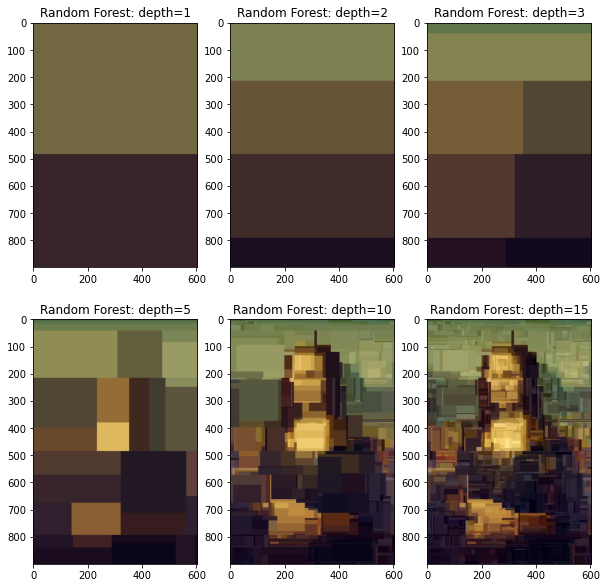

In [69]:
plt.figure(figsize=[10, 10]);
depth=[1,2,3,5,10,15]
for i,d in enumerate(depth):
    regressor = RandomForestRegressor(n_estimators = 1,random_state=0, max_depth= d) 
    regressor.fit(train_X, train_Y) 
    pred = np.zeros(np.shape(img))
    for row in range(img.shape[0]): 
        for col in range(img.shape[1]):
            loc=[row,col]
            loc=np.array(loc)
            pred[row,col]=regressor.predict(loc.reshape(1, 2)) /255    
    plt.subplot(2,3,i+1);
    plt.title("Random Forest: depth={}".format(d));
    plt.imshow(pred);

#### Experiments: random forest with depth 7 but with different number of trees

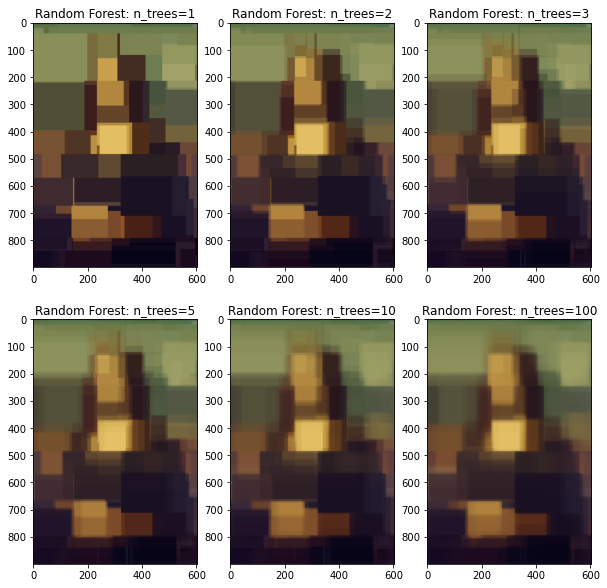

In [70]:
plt.figure(figsize=[10, 10]);
ntrees=[1,2,3,5,10,100]
for i,n in enumerate(ntrees):
    regressor = RandomForestRegressor(n_estimators = n,random_state=0, max_depth= 7) 
    regressor.fit(train_X, train_Y) 
    pred = np.zeros(np.shape(img))
    for row in range(img.shape[0]): 
        for col in range(img.shape[1]):
            loc=[row,col]
            loc=np.array(loc)
            pred[row,col]=regressor.predict(loc.reshape(1, 2)) /255    
    plt.subplot(2,3,i+1);
    plt.title("Random Forest: n_trees={}".format(n));
    plt.imshow(pred);

#### Experiments with kNN

In [73]:
from sklearn.neighbors import KNeighborsClassifier
def kNN(title):
    knn = KNeighborsClassifier(n_neighbors=1)
    knn.fit(train_X, train_Y) 
    pred = np.zeros(np.shape(img))
    for row in range(img.shape[0]): 
        for col in range(img.shape[1]):
            loc=[row,col]
            loc=np.array(loc)
            pred[row,col]=knn.predict(loc.reshape(1, 2)) /255 
    plt.title(title);
    plt.imshow(pred);

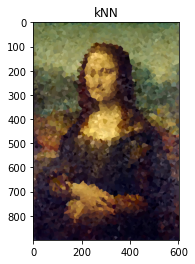

In [74]:
kNN(title = "kNN")

#### Experiments with different pruning strategies

In [77]:
rg = RandomForestRegressor(n_estimators = 1, max_depth= 7) 
rg.fit(train_X, train_Y) 
print("The accuracy score for random forest with n_trees =1 and depth =7 is: {:.2f} ".format(rg.score(test_X,test_Y)))
rg2 = RandomForestRegressor(n_estimators = 2, max_depth= 14) 
rg2.fit(train_X, train_Y) 
print("The accuracy score for random forest with n_trees =2 and depth =14 is: {:.2f} ".format(rg2.score(test_X,test_Y)))
rg3 = RandomForestRegressor(n_estimators = 30, max_depth= 14) 
rg3.fit(train_X, train_Y) 
print("The accuracy score for random forest with n_trees =30 and depth =14 is: {:.2f} ".format(rg3.score(test_X,test_Y)))
rg4 = RandomForestRegressor(n_estimators = 30, max_depth= 100) 
rg4.fit(train_X, train_Y) 
print("The accuracy score for random forest with n_trees =30 and depth =100 is: {:.2f} ".format(rg4.score(test_X,test_Y)))

The accuracy score for random forest with n_trees =1 and depth =7 is: 0.70 
The accuracy score for random forest with n_trees =2 and depth =14 is: 0.77 
The accuracy score for random forest with n_trees =30 and depth =14 is: 0.83 
The accuracy score for random forest with n_trees =30 and depth =100 is: 0.83 


In [78]:
# Using “mae” for the mean absolute error instead of default “mse” for the mean squared error
rg1 = RandomForestRegressor(n_estimators = 30, max_depth= 14,criterion="mae") 
rg1.fit(train_X, train_Y) 
print("The accuracy score for random forest with 'mae' is: {:.2f} ".format(rg1.score(test_X,test_Y)))

The accuracy score for random forest with 'mae' is: 0.83 


In [79]:
# Set a threshold for early stopping in tree growth. 
# A node will split if its impurity is above the threshold, otherwise it is a leaf.
rg1 = RandomForestRegressor(n_estimators = 30, max_depth= 14,min_impurity_decrease =1e-5) 
rg1.fit(train_X, train_Y) 
print("The accuracy score for random forest is: {:.2f} ".format(rg1.score(test_X,test_Y)))

The accuracy score for random forest is: 0.83 


In [80]:
#Adjust min_samples_split parameter
rg1 = RandomForestRegressor(n_estimators = 30, max_depth= 14,min_samples_split =5) 
rg1.fit(train_X, train_Y) 
print("The accuracy score for random forest with min_samples_split =5 is: {:.2f} ".format(rg1.score(test_X,test_Y)))
rg2 = RandomForestRegressor(n_estimators = 30, max_depth= 14,min_samples_split =20) 
rg2.fit(train_X, train_Y) 
print("The accuracy score for random forest with min_samples_split =20 is: {:.2f} ".format(rg2.score(test_X,test_Y)))

The accuracy score for random forest with min_samples_split =5 is: 0.83 
The accuracy score for random forest with min_samples_split =20 is: 0.81 


In [81]:
#Adjust min_samples_leaf parameter
rg1 = RandomForestRegressor(n_estimators = 30, max_depth= 14,min_samples_leaf =1) 
rg1.fit(train_X, train_Y) 
print("The accuracy score for random forest with min_sample_leaf =1 is: {:.2f} ".format(rg1.score(test_X,test_Y)))
rg2 = RandomForestRegressor(n_estimators = 30, max_depth= 14,min_samples_leaf =10) 
rg2.fit(train_X, train_Y) 
print("The accuracy score for random forest with min_sample_leaf =10 is: {:.2f} ".format(rg2.score(test_X,test_Y)))

The accuracy score for random forest with min_sample_leaf =1 is: 0.83 
The accuracy score for random forest with min_sample_leaf =10 is: 0.80 
